# Sandbox of how to do the shrinking

Created a method on the Cell class to do the shrinking

Just visually checking that the shrinking looks correct here


In [1]:
import SRRS
from SRRS import plotting

import matplotlib.pyplot as plt
import seaborn as sns
import shapely

In [2]:
sample = SRRS.HDF5('../../inputs/m1s1_subset.hdf5')
sample.num_cells

152

In [3]:
sample.cell_ids[:10]

[b'100090299132393774825374529480599642352',
 b'102762322167228082486052775619884277102',
 b'103963394979214788325793179983943807873',
 b'104773525917171323315032845506736864421',
 b'104887114217211410540888577620028568901',
 b'106736575396305345683133461207739252997',
 b'106771113274834466403933341586053551462',
 b'111300904473796808480218743996654298162',
 b'114601597319929030309061287706907914361',
 b'114794480420405132420944298037591232478']

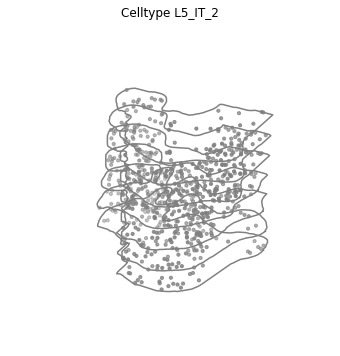

In [4]:
cell = sample.get_cells_by_id(['103963394979214788325793179983943807873'])[0]
plotting.plot_cell_3D(cell)
plt.show()
plt.close()

In [5]:
new_cell = cell.shrink_boundaries(scale_factor=0.8)
new_cell

Cell-103963394979214788325793179983943807873-L5_IT_2

In [6]:
cell.n

700

In [7]:
new_cell.n

448

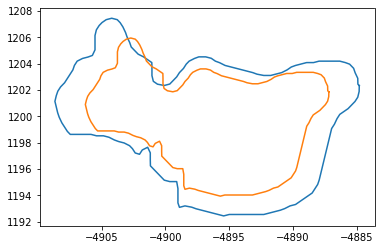

In [8]:
s = shapely.geometry.Polygon(cell.boundaries['0'])
small_s = shapely.geometry.Polygon(new_cell.boundaries['0'])

plt.plot(*s.exterior.xy)
plt.plot(*small_s.exterior.xy)
plt.show()
plt.close()